<a href="https://colab.research.google.com/github/santiagobenjumeaorozco/phyton/blob/main/Python_Santiago_Benjumea.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Conversión de datos de R a phyton


In [ ]:
from mpl_toolkits import mplot3d
import numpy as np
import pandas as pd

%matplotlib inline

In [ ]:
from numpy.ma.core import size
np.random.seed(1031178446)
Seqlat = np.arange(-73.30,-73.25,.001)
Seqlong = np.arange(5.54, 5.58, .001)
Latitude = pd.DataFrame.sample(pd.DataFrame(Seqlat), 100, replace = True)
Latitude = list(Latitude[0])
Longitude = pd.DataFrame.sample(pd.DataFrame(Seqlong), 100, replace = True)
Longitude = list(Longitude[0])

SMI= np.partition(np.random.uniform(0.7, 0.95, 100), 10)
NDVI= np.partition(np.random.uniform(0.45, 0.06, 100), 10)
LST= np.partition(26* sc.stats.beta.rvs(0.87, 0.91, size = 100), 10)

df1 = pd.DataFrame({"Lat":Latitude, "Lon":Longitude, "SMI":SMI, "NDVI":NDVI, "LST":LST})
df1["Posición"] = np.arange(len(df1))

print(df1.head())

      Lat    Lon       SMI      NDVI       LST  Posición
0 -73.258  5.567  0.700444  0.064514  1.341800         0
1 -73.286  5.576  0.710316  0.064876  0.026071         1
2 -73.267  5.547  0.709894  0.063689  1.002887         2
3 -73.256  5.558  0.708579  0.069217  0.859163         3
4 -73.300  5.558  0.701862  0.084574  1.482377         4


2. Graficar las coordenasdas en una nube de puntos

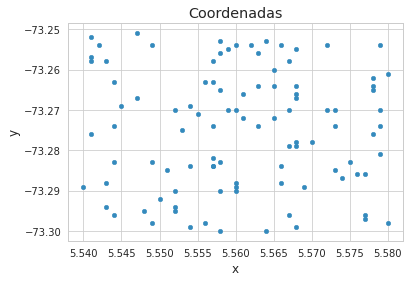

In [ ]:
xy=pd.DataFrame({"x": Longitude,
                 "y":Latitude})
xy.head()
xy.plot.scatter(x="x",y="y",)
plt.title('Coordenadas')
plt.show()

3. Asignacion al grafico de un tamaño al punto de acuerdo con el SMI

        x       y       SMI      NDVI        LST
0   5.567 -73.258  0.700444  0.064514   1.341800
1   5.576 -73.286  0.710316  0.064876   0.026071
2   5.547 -73.267  0.709894  0.063689   1.002887
3   5.558 -73.256  0.708579  0.069217   0.859163
4   5.558 -73.300  0.701862  0.084574   1.482377
..    ...     ...       ...       ...        ...
95  5.565 -73.264  0.885910  0.373025  12.741792
96  5.568 -73.278  0.891961  0.439995  14.777292
97  5.545 -73.269  0.949401  0.376349  16.841944
98  5.572 -73.270  0.913518  0.410585  22.566047
99  5.547 -73.251  0.888431  0.443547  23.581071

[100 rows x 5 columns]


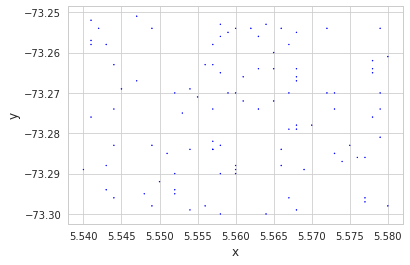

In [ ]:
df1=xy.copy()
df1['SMI']=SMI
df1['NDVI']=NDVI
df1['LST'] =LST
print(df1)
df1.plot.scatter(x = 'x', y = 'y', s = 'SMI', c = 'blue')

4. Asignacion al gráfico de un color al punto de acuerdo con el NDVI

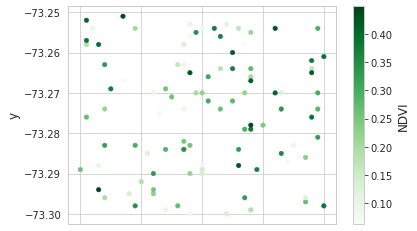

In [ ]:
NVDIgrafic = df1.plot.scatter(x='x', y='y', c='NDVI',colormap='Greens')

5. Asignación al gráfico de una forma al punto de acuerdo con el LST

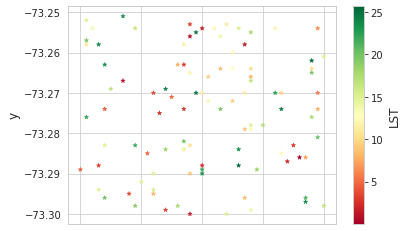

In [ ]:
LSTgrafic = df1.plot.scatter(x='x', y='y', c='LST',colormap='RdYlGn', marker='*')

7. Boxplot para SMI

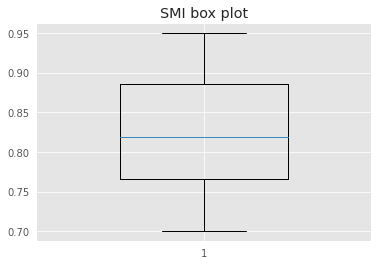

In [ ]:
plt.style.use('ggplot')
plt.boxplot(SMI, widths=(0.5))
plt.title("SMI box plot")
plt.show() # distribucion sin datos atipicos con media 0.82 

8. histograma para NDVI

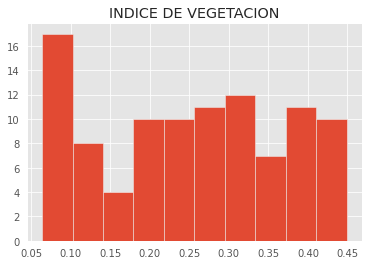

In [ ]:
histogram = df1.hist(column= 'NDVI')
plt.title("INDICE DE VEGETACION")
plt.show()

9. Densidad para LST

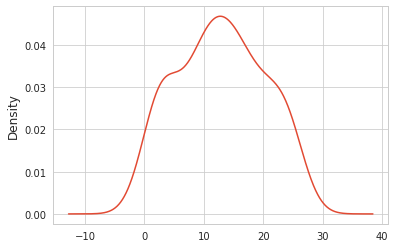

In [ ]:
df1['LST'].plot.kde()


10. Estadisticas descriptivas.

In [ ]:
df1.describe() 


,x,y,SMI,NDVI,LST
count,100.000000,100.000000,100.000000,100.000000,100.000000
mean,5.560680,-73.274840,0.822181,0.252036,12.842797
std,0.011355,0.014606,0.072043,0.114993,7.233591
min,5.540000,-73.300000,0.700444,0.063689,0.026071
25%,5.552000,-73.287250,0.766423,0.143560,7.768600
50%,5.560000,-73.274000,0.818859,0.259676,12.553024
75%,5.568000,-73.263000,0.885443,0.343893,18.259548
max,5.580000,-73.251000,0.949644,0.448922,25.657869


In [ ]:
average = ((df1['NDVI'].mean()), (df1['SMI'].mean()), (df1['LST'].mean()) )
print(average)

med = ((df1['NDVI'].median()), (df1['SMI'].median()), (df1['LST'].median()) )
print(med)

standard_deviation = ((df1['NDVI'].std()), (df1['SMI'].std()), (df1['LST'].std()) )
print(standard_deviation)

(0.25203645962561294, 0.8221806228747139, 12.842796625281153)
(0.25967610842972766, 0.8188586666116937, 12.553023756663453)
(0.11499267890050603, 0.07204291086180943, 7.233590873697264)


11. Fracciones los datos de latitud en 4 cuadrantes y etiquete los puntos como (I,II,II y IV) según el cuadrante y cree esta nueva variable(cuadrante como tipo factor o cadena) y calcule las estadísticas descriptivas por cuadrante



In [ ]:
I = df1.iloc[:25]
II = df1.iloc[25:50]
III = df1.iloc[50:75]
IV = df1.iloc[75:]

#Variables descriptivas de la latitud por cuadrante
average = ((I['x'].mean()), (II['x'].mean()), (III['x'].mean()), (IV['x'].mean()) )
print(average)

med = ((I['x'].median()), (II['x'].median()), (III['x'].median()), (IV['x'].mean())  )
print(med)

standard_deviation = ((I['x'].std()), (II['x'].std()), (III['x'].std()), (IV['x'].std()) )
print(standard_deviation)

(5.559280000000006, 5.5617600000000085, 5.557520000000006, 5.564160000000008)
(5.558000000000006, 5.560000000000007, 5.560000000000007, 5.564160000000008)
(0.01227300560852016, 0.008776293826746275, 0.011769027147563749, 0.011809882867049381)


12.Boxplot para SMI que muestra las cajas de los 4 cuadrantes en el mismo gráfico

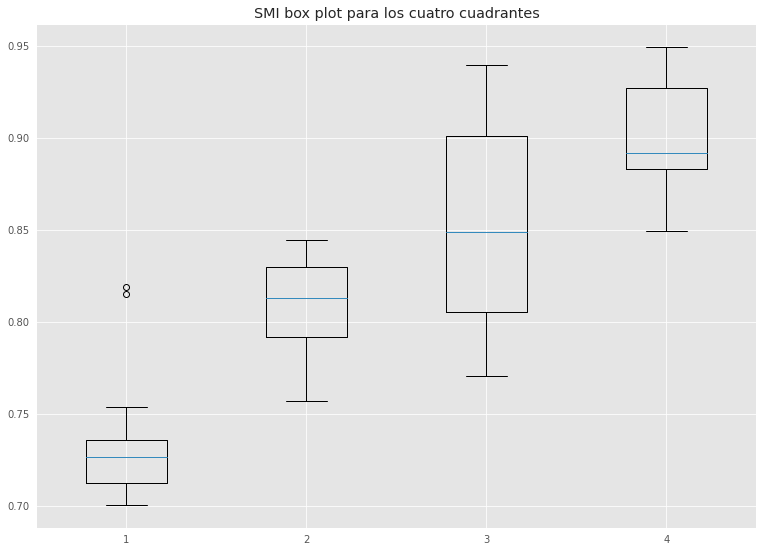

In [ ]:
#Boxplot SMI para los cuatro cuadrantes
Data = ((I['SMI']), (II['SMI']), (III['SMI']), (IV['SMI']))
plt.style.use('ggplot')
fig = plt.figure(figsize =(10, 7))
ax = fig.add_axes([0, 0, 1, 1])
plt.title("SMI box plot para los cuatro cuadrantes")
 
bp = ax.boxplot(Data)

plt.show()

13. histograma múltiple para NDVI que los muestre para los 4 cuadrantes en el mismo gráfico (superponiendo los histogramas)


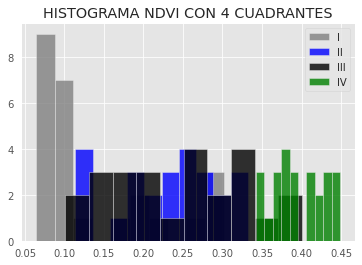

In [ ]:
#Histograma múltiple de NDVI para los distintos cuadrantes
Serie1= (I['NDVI'])
Serie2= (II['NDVI'])
Serie3= (III['NDVI'])
Serie4= (IV['NDVI'])

plt.style.use('ggplot')
plt.hist(Serie1, label='I', alpha=.8, color='gray')
plt.hist(Serie2, label='II', alpha=.8, color='blue')
plt.hist(Serie3, label='III', alpha=.8, color='black')
plt.hist(Serie4, label='IV', alpha=.8, color='green')

plt.title("HISTOGRAMA NDVI CON 4 CUADRANTES")
plt.legend()
plt.show()

14. gráfico de densidades múltiple para LST  lconos 4 cuadrantes en el mismo gráfico


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axe

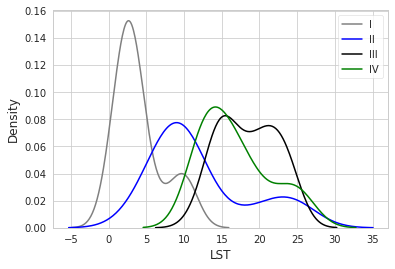

In [ ]:

sns.set_style('whitegrid')
g=sns.distplot((I['LST']),hist=False, color = "gray", label = 'I')
sns.distplot((II['LST']), hist=False, color = "blue", label = 'II')
sns.distplot((III['LST']), hist=False, color = "black", label = 'III')
sns.distplot((IV['LST']), hist=False, color = "green", label = 'IV')
g.legend()

15. Matriz de correlaciones de Pearson para las variables


In [ ]:

matriz= df1.corr()
matrizI =I.corr()
matrizII=II.corr()
matrizIII=III.corr()
matrizIV=IV.corr()

16. Gráfico de correlaciones para las variables




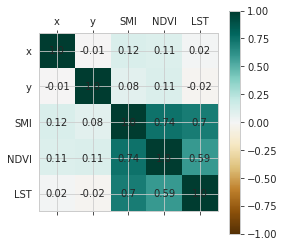

In [ ]:
plt.matshow(matriz,cmap="BrBG",vmin=-1, vmax=1)
plt.xticks(range(5),df1.columns)
plt.yticks(range(5),df1.columns)
for i in range(len(matriz.columns)):
  for j in range(len(matriz.columns)):
    plt.text(i, j, round(matriz.iloc[i,j],2),
             ha="center",va="center")
plt.colorbar()
plt.show()

17. Gráfico fraccionado de correlaciones por cuadrante 


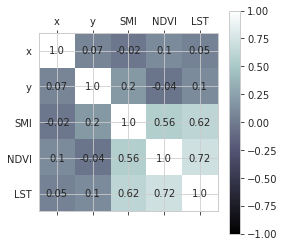

In [ ]:
CorI= plt.matshow(matrizI,cmap="bone",vmin=-1, vmax=1)
plt.xticks(range(5),df1.columns)
plt.yticks(range(5),df1.columns)
for i in range(len(matrizI.columns)):
  for j in range(len(matrizI.columns)):
    plt.text(i, j, round(matrizI.iloc[i,j],2),
             ha="center",va="center")
plt.colorbar()
plt.show()

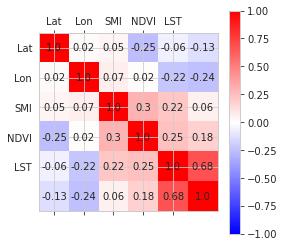

In [ ]:
CorII= plt.matshow(matrizII,cmap="bwr",vmin=-1, vmax=1)
plt.xticks(range(5),df1.columns)
plt.yticks(range(5),df1.columns)
for i in range(len(matrizII.columns)):
  for j in range(len(matrizII.columns)):
    plt.text(i, j, round(matrizII.iloc[i,j],2),
             ha="center",va="center")
plt.colorbar()
plt.show()

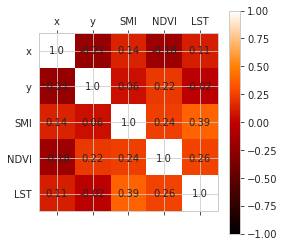

In [ ]:
CorIII= plt.matshow(matrizIII,cmap="gist_heat",vmin=-1, vmax=1)
plt.xticks(range(5),df1.columns)
plt.yticks(range(5),df1.columns)
for i in range(len(matrizIII.columns)):
  for j in range(len(matrizIII.columns)):
    plt.text(i, j, round(matrizIII.iloc[i,j],2),
             ha="center",va="center")
plt.colorbar()
plt.show()

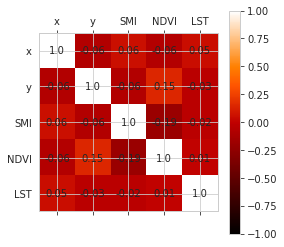

In [ ]:
CorIV=plt.matshow(matrizIV,cmap="gist_heat",vmin=-1, vmax=1)
plt.xticks(range(5),df1.columns)
plt.yticks(range(5),df1.columns)
for i in range(len(matrizIV.columns)):
  for j in range(len(matrizIV.columns)):
    plt.text(i, j, round(matrizIV.iloc[i,j],2),
             ha="center",va="center")
plt.colorbar()
plt.show()


18. Ajuste algún modelo de regresión lineal simple entre el NDVI (respuesta) y el LST



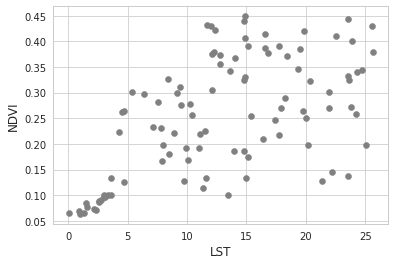

Interseccion(b) 0.13226982731677075
Pendiente (m) [0.00932559]


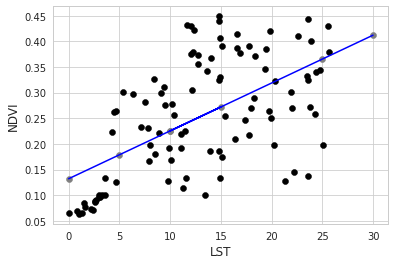

In [ ]:
df1
plt.ylabel("NDVI")
plt.xlabel("LST")
plt.scatter(df1["LST"],df1["NDVI"],color="gray")
plt.show()

from sklearn import linear_model
regresion= linear_model.LinearRegression()
VectorLST=df1["LST"].values.reshape((-1,1))
modelo = regresion.fit(VectorLST,df1["NDVI"])
print("Interseccion(b)",modelo.intercept_)
print("Pendiente (m)",modelo.coef_)

ValoresLST =[[0],[5],[10],[15],[10],[25],[30]]
modelo.predict(ValoresLST)

##
plt.scatter(ValoresLST, modelo.predict(ValoresLST), color="gray")
plt.plot(ValoresLST, modelo.predict(ValoresLST),color="blue")
plt.ylabel("NDVI")
plt.xlabel("LST")
plt.scatter(df1["LST"],df1["NDVI"],color="black")
plt.show()

19. Ajuste un modelo de regresión múltiple entre NDVI (respuesta) con  LST y SMI

In [ ]:
multiple = smf.ols("NDVI ~ LST + SMI",df1)
result= Multiple.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   NDVI   R-squared:                       0.562
Model:                            OLS   Adj. R-squared:                  0.553
Method:                 Least Squares   F-statistic:                     62.27
Date:                Thu, 10 Feb 2022   Prob (F-statistic):           4.01e-18
Time:                        03:01:14   Log-Likelihood:                 116.19
No. Observations:                 100   AIC:                            -226.4
Df Residuals:                      97   BIC:                            -218.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.6361      0.112     -5.697      0.000      -0.858      -0.415
LST            0.0020      0.002      1.307      0.194      -0.001       0.005
SMI            1.0496      0.151      6.950      0.000       0.750       1.349
==============================================================================
Omnibus:                        1.484   Durbin-Watson:                   0.968
Prob(Omnibus):                  0.476   Jarque-Bera (JB):                1.086
Skew:                          -0.246   Prob(JB):                        0.581
Kurtosis:                       3.137   Cond. No.                         360.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

20. Tome una muestra del 80% del data.frame y calcule la matriz de correlaciones por cuadrante. Compare con el caso de todos los datos.

In [ ]:
df80= df1.sample(frac=.8)
I80 =I.sample(frac=.8)
II80=II.sample(frac=.8)
III80=III.sample(frac=.8)
IV80=IV.sample(frac=.8)

#Matriz
matriz8= df80.corr()
matrizI8 =I80.corr()
matrizII8=II80.corr()
matrizIII8=III80.corr()
matrizIV8=IV80.corr()

20. Comparacion

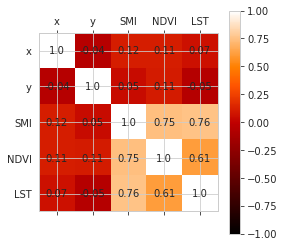

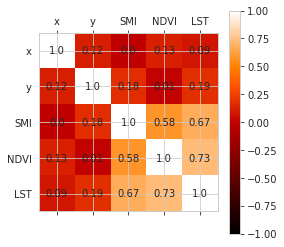

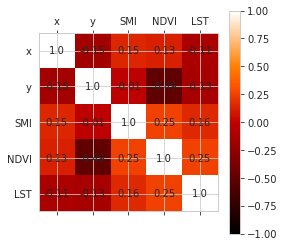

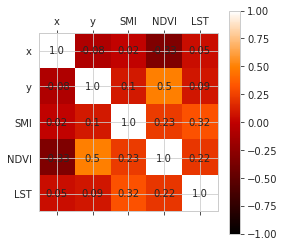

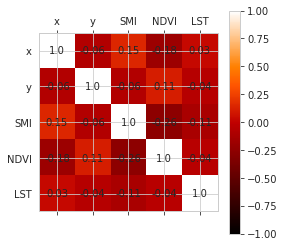

In [ ]:

Cor8= plt.matshow(matriz8,cmap="gist_heat",vmin=-1, vmax=1)
plt.xticks(range(5),df80.columns)
plt.yticks(range(5),df80.columns)
for i in range(len(matriz8.columns)):
  for j in range(len(matriz8.columns)):
    plt.text(i, j, round(matriz8.iloc[i,j],2),
             ha="center",va="center")

plt.colorbar()
plt.show()
# I
Cor8I= plt.matshow(matrizI8,cmap="gist_heat",vmin=-1, vmax=1)
plt.xticks(range(5),df80.columns)
plt.yticks(range(5),df80.columns)
for i in range(len(matrizI8.columns)):
  for j in range(len(matrizI8.columns)):
    plt.text(i, j, round(matrizI8.iloc[i,j],2),
             ha="center",va="center")


plt.colorbar()
plt.show()
#II    
Cor8II= plt.matshow(matrizII8,cmap="gist_heat",vmin=-1, vmax=1)
plt.xticks(range(5),df80.columns)
plt.yticks(range(5),df80.columns)
for i in range(len(matrizII8.columns)):
  for j in range(len(matrizII8.columns)):
    plt.text(i, j, round(matrizII8.iloc[i,j],2),
             ha="center",va="center")

plt.colorbar()
plt.show()
#III
Cor8III= plt.matshow(matrizIII8,cmap="gist_heat",vmin=-1, vmax=1)
plt.xticks(range(5),df80.columns)
plt.yticks(range(5),df80.columns)
for i in range(len(matrizIII8.columns)):
  for j in range(len(matrizIII8.columns)):
    plt.text(i, j, round(matrizIII8.iloc[i,j],2),
             ha="center",va="center")

plt.colorbar()
plt.show()
# IV
Cor8IV=plt.matshow(matrizIV8,cmap="gist_heat",vmin=-1, vmax=1)
plt.xticks(range(5),df80.columns)
plt.yticks(range(5),df80.columns)
for i in range(len(matrizIV8.columns)):
  for j in range(len(matrizIV8.columns)):
    plt.text(i, j, round(matrizIV8.iloc[i,j],2),
             ha="center",va="center")

plt.colorbar()
plt.show()